In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv(r'C:\Users\Peng\Desktop\New folder\PreScreen_r3\palm_ffb.csv')

In [2]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

68968.59804154628 0.0


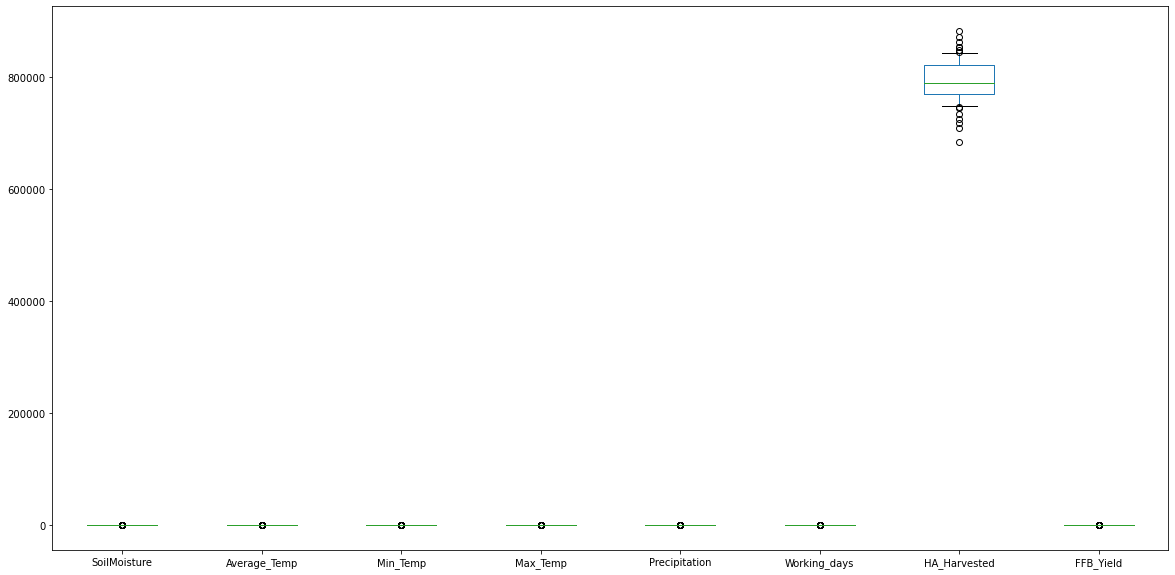

In [3]:
boxplots=df.boxplot(column=['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested','FFB_Yield'], grid=False, figsize=(20,10),
                   whis=[5,95], return_type='axes')
fvalue, pvalue = stats.f_oneway(df['SoilMoisture'], df['Average_Temp'], df['Min_Temp'], df['Max_Temp'], df['Precipitation'], df['Working_days'], df['HA_Harvested'], df['FFB_Yield'] )
print(fvalue, pvalue)

In [4]:
d_melt = pd.melt(df.reset_index(), id_vars=['target'], value_vars=['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested','FFB_Yield'])
d_melt.columns = ['target', 'ChemicalProperties', 'value']
model = ols('value ~ C(ChemicalProperties)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(ChemicalProperties),7.158332e+13,7.0,68968.598042,0.0
Residual,1.530179e+11,1032.0,NaN,NaN


<AxesSubplot:xlabel='target', ylabel='value'>

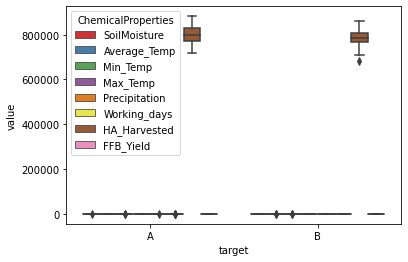

In [5]:
sns.boxplot(x='target', y='value', hue='ChemicalProperties', data=d_melt, palette='Set1')

In [6]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['ChemicalProperties'], alpha=0.05)
print(m_comp)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1        group2      meandiff   p-adj    lower        upper     reject
-------------------------------------------------------------------------------
 Average_Temp     FFB_Yield     -25.2477   0.9   -4612.3161    4561.8207  False
 Average_Temp  HA_Harvested  793377.6416 0.001  788790.5732  797964.7101   True
 Average_Temp      Max_Temp       7.0016   0.9   -4580.0668      4594.07  False
 Average_Temp      Min_Temp      -5.4707   0.9   -4592.5391    4581.5977  False
 Average_Temp Precipitation     162.1309   0.9   -4424.9376    4749.1993  False
 Average_Temp  SoilMoisture      500.797   0.9   -4086.2714    5087.8654  False
 Average_Temp  Working_days      -2.0961   0.9   -4589.1645    4584.9723  False
    FFB_Yield  HA_Harvested  793402.8893 0.001  788815.8209  797989.9577   True
    FFB_Yield      Max_Temp      32.2493   0.9   -4554.8191    4619.3177  False
    FFB_Yield      Min_Temp       19.777

In [7]:
w, pvalue = stats.levene(df['SoilMoisture'], df['Average_Temp'], df['Min_Temp'], df['Max_Temp'], df['Precipitation'], df['Working_days'], df['HA_Harvested'], df['FFB_Yield'] )
print(w, pvalue)

264.72770583646366 2.51432748833662e-225


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

test=df.to_numpy()

X = test[:, 0:9] 
y = test[:, 8]
x_train, x_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

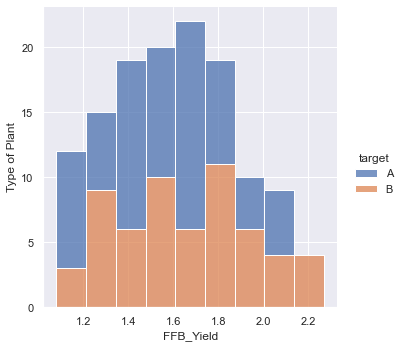

In [21]:
g=sns.displot(data=df, x="FFB_Yield", hue="target", multiple="stack")
g.set_axis_labels("FFB_Yield", "Type of Plant")

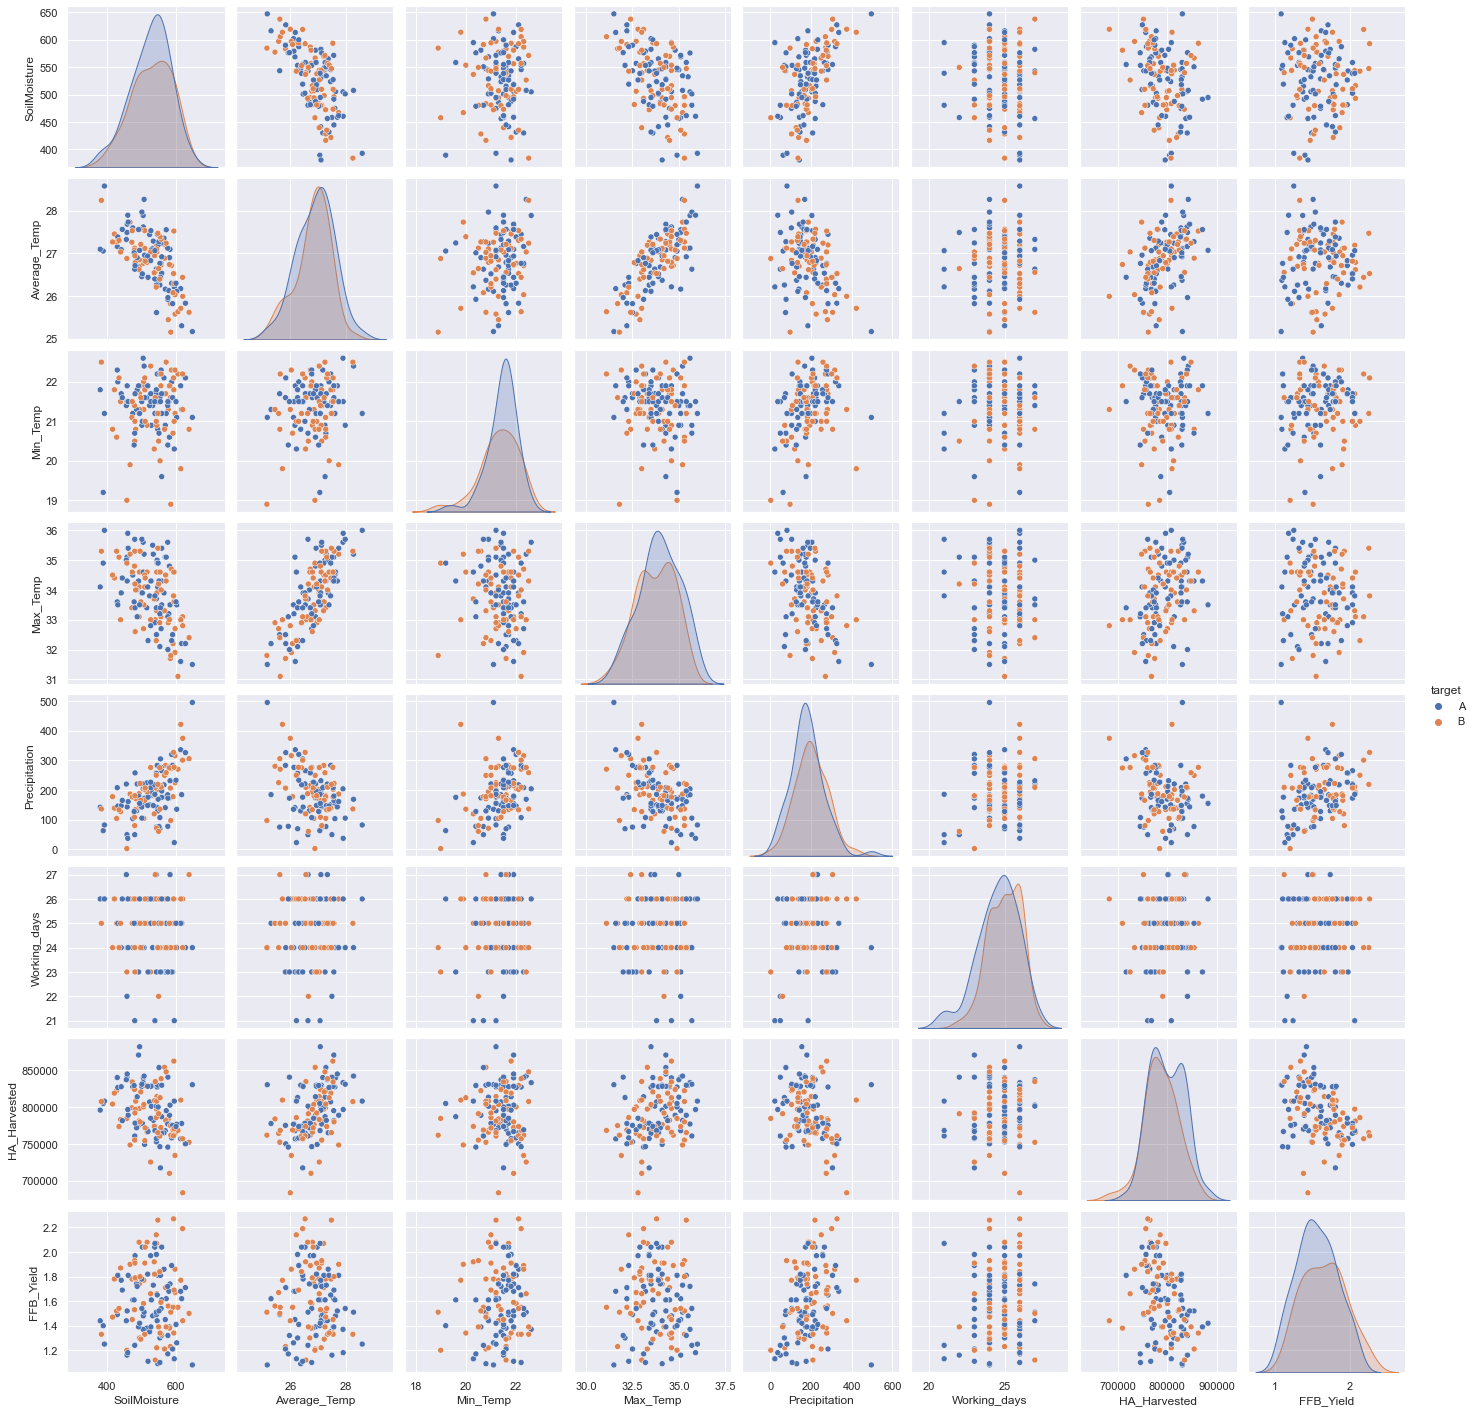

In [22]:
sns.pairplot(df, hue="target", height=2.5)